In [3]:
import cv2

mask_path ="C:/sample_ex3000/filtered_defect/train/masksreal/RGB_cell_cylindrical_0001_010.png"
mask = cv2.imread(mask_path)

if mask is None:
    print("🚨 파일을 찾을 수 없습니다. 경로를 확인하세요!")
else:
    print("✅ 파일을 정상적으로 불러왔습니다. shape:", mask.shape)


✅ 파일을 정상적으로 불러왔습니다. shape: (224, 224, 3)


C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

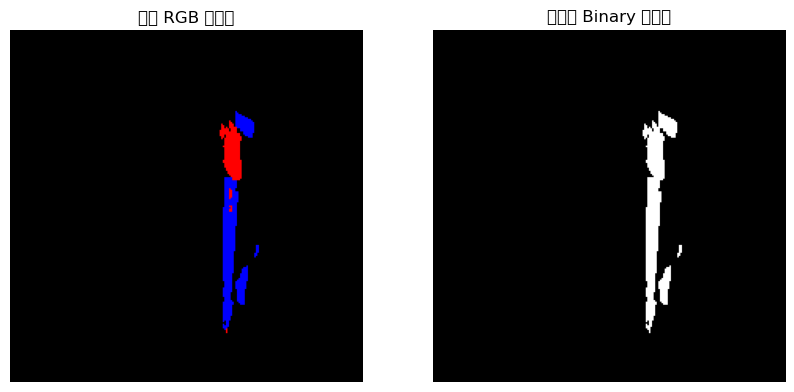

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 마스크 이미지 불러오기
mask_path = "C:/sample_ex3000/filtered_defect/train/masksreal/RGB_cell_cylindrical_0001_010.png"
mask = cv2.imread(mask_path)  # (H, W, 3) RGB
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # OpenCV는 기본 BGR이므로 RGB로 변환

# 빨강+파랑 부분을 흰색(255)으로 만들기
gray_mask = np.zeros(mask.shape[:2], dtype=np.uint8)  # 빈 마스크 (H, W)

# 빨강(255, 0, 0) 또는 파랑(0, 0, 255)이 있는 부분을 흰색(255)으로 변경
red_blue_mask = (mask[:, :, 0] > 100) | (mask[:, :, 2] > 100)  # R or B > 100이면 불량
gray_mask[red_blue_mask] = 255  # 흰색 (불량)

# 결과 확인
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.title("원본 RGB 마스크")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_mask, cmap="gray")
plt.title("변환된 Binary 마스크")
plt.axis("off")

plt.show()


In [5]:
import os
import cv2
import numpy as np

# 원본 마스크 폴더와 변환된 마스크 저장 폴더 설정
mask_dir = "C:/sample_ex3000/filtered_defect/train/masksreal/"
output_dir = "C:/sample_ex3000/filtered_defect/train/masks_binary/"

# 저장할 폴더가 없으면 생성
os.makedirs(output_dir, exist_ok=True)

# 모든 파일 변환
for mask_file in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, mask_file)
    
    # 마스크 불러오기
    mask = cv2.imread(mask_path)
    
    if mask is None:
        print(f"파일 불러오기 실패: {mask_file}")
        continue
    
    # RGB → Binary 변환
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    binary_mask = np.zeros(mask.shape[:2], dtype=np.uint8)  # 빈 마스크 생성

    # 빨강 + 파랑을 흰색(255)으로 변환
    binary_mask[(mask[:, :, 0] > 100) | (mask[:, :, 2] > 100)] = 255  # R > 100 또는 B > 100이면 불량
    
    # 변환된 마스크 저장
    save_path = os.path.join(output_dir, mask_file)
    cv2.imwrite(save_path, binary_mask)

print("모든 마스크 변환 완료!")

모든 마스크 변환 완료!


In [6]:
import os
import cv2
import numpy as np

# 원본 마스크 폴더와 변환된 마스크 저장 폴더 설정
mask_dirs = {
    "val": "C:/sample_ex3000/filtered_defect/val/masksreal/",
    "test": "C:/sample_ex3000/filtered_defect/test/masksreal/"
}

output_dirs = {
    "val": "C:/sample_ex3000/filtered_defect/val/masks_binary/",
    "test": "C:/sample_ex3000/filtered_defect/test/masks_binary/"
}

# 저장할 폴더 생성
for folder in output_dirs.values():
    os.makedirs(folder, exist_ok=True)

# 모든 데이터셋(train, val, test)에 대해 변환 수행
for dataset, mask_dir in mask_dirs.items():
    output_dir = output_dirs[dataset]
    
    print(f"{dataset} 데이터셋 마스크 변환 중...")

    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        
        # 마스크 불러오기
        mask = cv2.imread(mask_path)
        
        if mask is None:
            print(f"파일 불러오기 실패: {mask_file}")
            continue
        
        # RGB → Binary 변환
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        binary_mask = np.zeros(mask.shape[:2], dtype=np.uint8)  # 빈 마스크 생성

        # 빨강 + 파랑을 흰색(255)으로 변환
        binary_mask[(mask[:, :, 0] > 100) | (mask[:, :, 2] > 100)] = 255  # R > 100 또는 B > 100이면 불량
        
        # 변환된 마스크 저장
        save_path = os.path.join(output_dir, mask_file)
        cv2.imwrite(save_path, binary_mask)

    print(f" {dataset} 데이터셋 변환 완료!")

print("모든 마스크 변환 완료!")


val 데이터셋 마스크 변환 중...
 val 데이터셋 변환 완료!
test 데이터셋 마스크 변환 중...
 test 데이터셋 변환 완료!
모든 마스크 변환 완료!


In [15]:
import numpy as np
import tensorflow as tf
import cv2
import os
from glob import glob

# 경로 설정 (사용자가 지정한 폴더)
image_dir = {
    "train": "C:/sample_ex3000/filtered_defect/train/images/",
    "val": "C:/sample_ex3000/filtered_defect/val/images/",
    "test": "C:/sample_ex3000/filtered_defect/test/images/"
}

mask_dir = {
    "train": "C:/sample_ex3000/filtered_defect/train/masks_binary/",
    "val": "C:/sample_ex3000/filtered_defect/val/masks_binary/",
    "test": "C:/sample_ex3000/filtered_defect/test/masks_binary/"
}

# 이미지 & 마스크 로드 함수
def load_images_masks(image_path, mask_path):
    image = cv2.imread(image_path)  # BGR 로드
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB 변환
    image = cv2.resize(image, (224, 224))  # 크기 조정

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # 흑백 마스크 로드
    mask = cv2.resize(mask, (224, 224))  # 크기 조정
    mask = (mask > 0).astype(np.uint8)  # 이진화 (0,1)

    return image, mask

# 데이터 불러오기
def load_dataset(image_folder, mask_folder):
    image_paths = sorted(glob(os.path.join(image_folder, "*.png")))
    mask_paths = sorted(glob(os.path.join(mask_folder, "*.png")))

    images, masks = [], []
    for img_path, msk_path in zip(image_paths, mask_paths):
        img, msk = load_images_masks(img_path, msk_path)
        images.append(img)
        masks.append(msk)

    return np.array(images), np.array(masks)

# 데이터 로드
X_train, Y_train = load_dataset(image_dir["train"], mask_dir["train"])
X_val, Y_val = load_dataset(image_dir["val"], mask_dir["val"])
X_test, Y_test = load_dataset(image_dir["test"], mask_dir["test"])

# 차원 확인 (H, W, C)
print(" X_train:", X_train.shape, "Y_train:", Y_train.shape)
print(" X_val:", X_val.shape, "Y_val:", Y_val.shape)
print(" X_test:", X_test.shape, "Y_test:", Y_test.shape)

 X_train: (1587, 224, 224, 3) Y_train: (1587, 224, 224)
 X_val: (225, 224, 224, 3) Y_val: (225, 224, 224)
 X_test: (188, 224, 224, 3) Y_test: (188, 224, 224)


In [16]:
# 정규화 수행
X_train = X_train.astype(np.float32) / 255.0
X_val = X_val.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# 마스크는 0,1 값 유지
Y_train = np.expand_dims(Y_train, axis=-1)  # (H, W) → (H, W, 1)
Y_val = np.expand_dims(Y_val, axis=-1)
Y_test = np.expand_dims(Y_test, axis=-1)

# 변환 후 확인
print(" X_train 범위:", np.min(X_train), "to", np.max(X_train))
print(" Y_train 고유값:", np.unique(Y_train))  # [0, 1]이면 정상


 X_train 범위: 0.0 to 1.0
 Y_train 고유값: [0 1]


In [17]:
import tensorflow as tf

# TensorFlow Dataset 변환
def create_tf_dataset(X, Y, batch_size=4, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

# 데이터셋 생성
train_dataset = create_tf_dataset(X_train, Y_train, batch_size=4)
val_dataset = create_tf_dataset(X_val, Y_val, batch_size=4, shuffle=False)
test_dataset = create_tf_dataset(X_test, Y_test, batch_size=4, shuffle=False)

# 확인
print("tf.data.Dataset 변환 완료!")


tf.data.Dataset 변환 완료!


In [18]:
#unet모델 정의 
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2

# U-Net with MobileNetV2 Backbone
def build_unet_mobilenet(input_shape=(224, 224, 3)):
    # MobileNetV2 백본 (Feature Extractor)
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights="imagenet")

    # Encoder에서 Skip Connection 가져오기
    skips = [
        base_model.get_layer("block_1_expand_relu").output,  # (112, 112, 96)
        base_model.get_layer("block_3_expand_relu").output,  # (56, 56, 144)
        base_model.get_layer("block_6_expand_relu").output,  # (28, 28, 192)
        base_model.get_layer("block_13_expand_relu").output,  # (14, 14, 576)
    ]
    encoder_output = base_model.get_layer("block_16_project").output  # (7, 7, 320)

    # Decoder (업샘플링)
    up_stack = [
        (256, (3, 3)),  # (14, 14, 256)
        (128, (3, 3)),  # (28, 28, 128)
        (64, (3, 3)),   # (56, 56, 64)
        (32, (3, 3)),   # (112, 112, 32)
    ]

    x = encoder_output
    for (filters, kernel_size), skip in zip(up_stack, reversed(skips)):
        x = layers.Conv2DTranspose(filters, kernel_size, strides=2, padding="same", activation="relu")(x)
        x = layers.concatenate([x, skip])
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.2)(x)
        x = layers.Conv2D(filters, (3, 3), padding="same", activation="relu")(x)

    # 최종 업샘플링
    x = layers.Conv2DTranspose(16, (3, 3), strides=2, padding="same", activation="relu")(x)
    outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(x)  # 1채널 마스크 (Sigmoid 활성화)

    return Model(inputs=base_model.input, outputs=outputs)

# 모델 생성
model = build_unet_mobilenet()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,420,129 (20.68 MB)

 Trainable params: 5,386,241 (20.55 MB)

 Non-trainable params: 33,888 (132.38 KB)

In [20]:
import tensorflow.keras.backend as K
import tensorflow as tf

# Dice 손실 함수 정의
def dice_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # 🔥 변환 추가
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

# Binary Cross Entropy + Dice Loss 혼합 손실
def bce_dice_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # 🔥 변환 추가
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    return bce + dice_loss(y_true, y_pred)

# Dice 계수 (평가지표)
def dice_coefficient(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # 🔥 변환 추가
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=bce_dice_loss,
              metrics=[dice_coefficient])

# 콜백 설정 (EarlyStopping + ModelCheckpoint)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_unet_model.h5", monitor='val_loss', save_best_only=True)
]

# 모델 학습
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val),
                    epochs=20,
                    batch_size=8,
                    callbacks=callbacks)

# 학습 완료 후 저장
model.save("final_unet_model.h5")

Epoch 1/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 922ms/step - dice_coefficient: 0.0503 - loss: 1.3381

199/199 ━━━━━━━━━━━━━━━━━━━━ 210s 955ms/step - dice_coefficient: 0.0508 - loss: 1.3367 - val_dice_coefficient: 0.0704 - val_loss: 0.9957
Epoch 2/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 183s 920ms/step - dice_coefficient: 0.4874 - loss: 0.5533 - val_dice_coefficient: 0.0766 - val_loss: 1.0042
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step - dice_coefficient: 0.5780 - loss: 0.4592

199/199 ━━━━━━━━━━━━━━━━━━━━ 183s 917ms/step - dice_coefficient: 0.5781 - loss: 0.4591 - val_dice_coefficient: 0.1636 - val_loss: 0.9081
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - dice_coefficient: 0.6072 - loss: 0.4286

199/199 ━━━━━━━━━━━━━━━━━━━━ 187s 939ms/step - dice_coefficient: 0.6072 - loss: 0.4286 - val_dice_coefficient: 0.2819 - val_loss: 0.7738
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - dice_coefficient: 0.6249 - loss: 0.4107

199/199 ━━━━━━━━━━━━━━━━━━━━ 184s 924ms/step - dice_coefficient: 0.6250 - loss: 0.4106 - val_dice_coefficient: 0.4082 - val_loss: 0.6362
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 182s 916ms/step - dice_coefficient: 0.6685 - loss: 0.3636 - val_dice_coefficient: 0.3765 - val_loss: 0.6721
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - dice_coefficient: 0.6902 - loss: 0.3394

199/199 ━━━━━━━━━━━━━━━━━━━━ 181s 912ms/step - dice_coefficient: 0.6901 - loss: 0.3395 - val_dice_coefficient: 0.4901 - val_loss: 0.5473
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 182s 913ms/step - dice_coefficient: 0.6810 - loss: 0.3485 - val_dice_coefficient: 0.4395 - val_loss: 0.6091
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - dice_coefficient: 0.6883 - loss: 0.3405

199/199 ━━━━━━━━━━━━━━━━━━━━ 182s 916ms/step - dice_coefficient: 0.6883 - loss: 0.3405 - val_dice_coefficient: 0.5059 - val_loss: 0.5352
Epoch 10/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - dice_coefficient: 0.7194 - loss: 0.3088

199/199 ━━━━━━━━━━━━━━━━━━━━ 183s 917ms/step - dice_coefficient: 0.7194 - loss: 0.3089 - val_dice_coefficient: 0.5247 - val_loss: 0.5169
Epoch 11/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - dice_coefficient: 0.6978 - loss: 0.3298

199/199 ━━━━━━━━━━━━━━━━━━━━ 182s 914ms/step - dice_coefficient: 0.6979 - loss: 0.3297 - val_dice_coefficient: 0.5622 - val_loss: 0.4764
Epoch 12/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - dice_coefficient: 0.7181 - loss: 0.3079

199/199 ━━━━━━━━━━━━━━━━━━━━ 183s 919ms/step - dice_coefficient: 0.7181 - loss: 0.3080 - val_dice_coefficient: 0.5990 - val_loss: 0.4345
Epoch 13/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 186s 934ms/step - dice_coefficient: 0.7354 - loss: 0.2900 - val_dice_coefficient: 0.5587 - val_loss: 0.4848
Epoch 14/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 186s 935ms/step - dice_coefficient: 0.7284 - loss: 0.2953 - val_dice_coefficient: 0.5909 - val_loss: 0.4501
Epoch 15/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - dice_coefficient: 0.7424 - loss: 0.2806

199/199 ━━━━━━━━━━━━━━━━━━━━ 183s 920ms/step - dice_coefficient: 0.7424 - loss: 0.2806 - val_dice_coefficient: 0.6156 - val_loss: 0.4205
Epoch 16/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - dice_coefficient: 0.7444 - loss: 0.2794

199/199 ━━━━━━━━━━━━━━━━━━━━ 189s 950ms/step - dice_coefficient: 0.7444 - loss: 0.2794 - val_dice_coefficient: 0.6280 - val_loss: 0.4089
Epoch 17/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 183s 920ms/step - dice_coefficient: 0.7499 - loss: 0.2731 - val_dice_coefficient: 0.6260 - val_loss: 0.4113
Epoch 18/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - dice_coefficient: 0.7574 - loss: 0.2653

199/199 ━━━━━━━━━━━━━━━━━━━━ 182s 917ms/step - dice_coefficient: 0.7574 - loss: 0.2653 - val_dice_coefficient: 0.6355 - val_loss: 0.4062
Epoch 19/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - dice_coefficient: 0.7557 - loss: 0.2676

199/199 ━━━━━━━━━━━━━━━━━━━━ 186s 936ms/step - dice_coefficient: 0.7557 - loss: 0.2675 - val_dice_coefficient: 0.6504 - val_loss: 0.3845
Epoch 20/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 184s 924ms/step - dice_coefficient: 0.7631 - loss: 0.2587 - val_dice_coefficient: 0.6509 - val_loss: 0.3850


C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


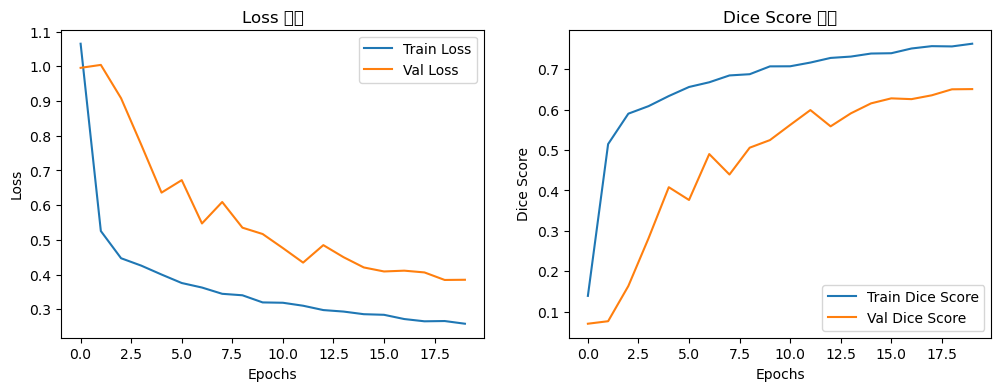

In [21]:
import matplotlib.pyplot as plt

# 학습 로그에서 loss & dice score 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_dice = history.history['dice_coefficient']
val_dice = history.history['val_dice_coefficient']

# Loss 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss 변화")

# Dice Score 그래프
plt.subplot(1, 2, 2)
plt.plot(train_dice, label="Train Dice Score")
plt.plot(val_dice, label="Val Dice Score")
plt.xlabel("Epochs")
plt.ylabel("Dice Score")
plt.legend()
plt.title("Dice Score 변화")

plt.show()

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")  # Windows의 경우
# plt.rc("font", family="AppleGothic")  # Mac의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

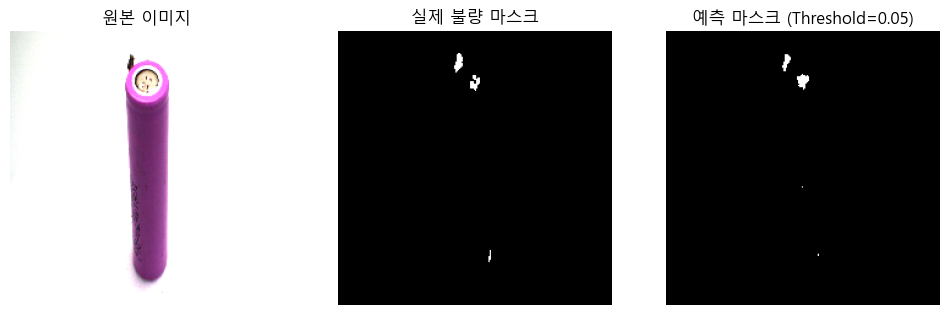

In [25]:
import matplotlib.pyplot as plt

# 랜덤 샘플 선택
idx = np.random.randint(0, len(X_test))
image = X_test[idx]
true_mask = Y_test[idx].squeeze()
pred_mask = predictions_binary[idx].squeeze()

# 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("원본 이미지")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(true_mask, cmap="gray")
plt.title("실제 불량 마스크")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(pred_mask, cmap="gray")
plt.title(f"예측 마스크 (Threshold={threshold})")
plt.axis("off")

plt.show()   

In [62]:
import numpy as np
from tensorflow.keras.models import load_model

# HDF5 모델 로드
model = load_model("final_unet_model.h5", compile=False)

# 예측 수행 (X_test 전체 데이터 사용)
predictions = model.predict(X_test)

# Threshold 적용 (0.04사용)
threshold = 0.04
predictions_binary = (predictions > threshold).astype(np.uint8)

# 크기 다시 확인
print(f"Y_test.shape: {Y_test.shape}")  # (188, 224, 224)
print(f"predictions_binary.shape: {predictions_binary.shape}")  # (188, 224, 224, 1)

# IoU (Intersection over Union) 계산 함수
def compute_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

# Dice Score 계산 함수
def compute_dice(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return (2. * intersection) / (y_true.sum() + y_pred.sum()) if (y_true.sum() + y_pred.sum()) != 0 else 0

# 전체 테스트셋에 대한 성능 평가
ious, dices = [], []
for i in range(len(Y_test)):
    iou_score = compute_iou(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    dice_score = compute_dice(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    ious.append(iou_score)
    dices.append(dice_score)

# 평균 IoU & Dice Score 출력
print(f"평균 IoU Score: {np.mean(ious):.4f}")
print(f"평균 Dice Score: {np.mean(dices):.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 925ms/step
Y_test.shape: (188, 224, 224)
predictions_binary.shape: (188, 224, 224, 1)
평균 IoU Score: 0.3964
평균 Dice Score: 0.5331


In [61]:
import numpy as np
from tensorflow.keras.models import load_model

# HDF5 모델 로드
model = load_model("final_unet_model.h5", compile=False)

# IoU 계산 함수
def compute_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

# Dice Score 계산 함수
def compute_dice(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return (2. * intersection) / (y_true.sum() + y_pred.sum()) if (y_true.sum() + y_pred.sum()) != 0 else 0

# 예측 수행
predictions = model.predict(X_test)

# 여러 Threshold 값을 테스트
best_threshold = 0
best_dice = 0

for t in np.arange(0.03, 0.1, 0.005):  # 0.03 ~ 0.1까지 0.005 단위로 테스트
    predictions_binary = (predictions > t).astype(np.uint8)
    
    dices = [compute_dice(Y_test[i].squeeze(), predictions_binary[i].squeeze()) for i in range(len(Y_test))]
    mean_dice = np.mean(dices)

    print(f"Threshold={t:.3f}: 평균 Dice Score = {mean_dice:.4f}")

    if mean_dice > best_dice:
        best_dice = mean_dice
        best_threshold = t

# 최적 Threshold 출력
print(f"\n최적 Threshold: {best_threshold:.5f}, 최고 Dice Score: {best_dice:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 955ms/step
Threshold=0.030: 평균 Dice Score = 0.5330
Threshold=0.035: 평균 Dice Score = 0.5329
Threshold=0.040: 평균 Dice Score = 0.5331
Threshold=0.045: 평균 Dice Score = 0.5328
Threshold=0.050: 평균 Dice Score = 0.5324
Threshold=0.055: 평균 Dice Score = 0.5320
Threshold=0.060: 평균 Dice Score = 0.5321
Threshold=0.065: 평균 Dice Score = 0.5319
Threshold=0.070: 평균 Dice Score = 0.5316
Threshold=0.075: 평균 Dice Score = 0.5312
Threshold=0.080: 평균 Dice Score = 0.5310
Threshold=0.085: 평균 Dice Score = 0.5305
Threshold=0.090: 평균 Dice Score = 0.5301
Threshold=0.095: 평균 Dice Score = 0.5296
Threshold=0.100: 평균 Dice Score = 0.5293

최적 Threshold: 0.04000, 최고 Dice Score: 0.5331


In [56]:
# 예측값 크기 확인
print(f"predictions.shape: {predictions.shape}")  
print(f"Y_test.shape: {Y_test.shape}")  

predictions.shape: (188, 224, 224, 1)
Y_test.shape: (188, 224, 224)


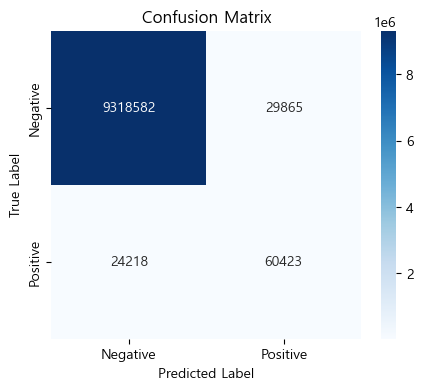

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 차원 변경
y_true_flat = Y_test.reshape(-1)  # 정답 데이터 (Flatten)
y_pred_flat = predictions_binary.reshape(-1)  # 예측 데이터 (Flatten)

# 혼동 행렬 계산
cm = confusion_matrix(y_true_flat, y_pred_flat)

# 시각화
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
print(model.summary())  # 현재 불러온 모델 구조 확인

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,420,129 (20.68 MB)

 Trainable params: 5,386,241 (20.55 MB)

 Non-trainable params: 33,888 (132.38 KB)

None


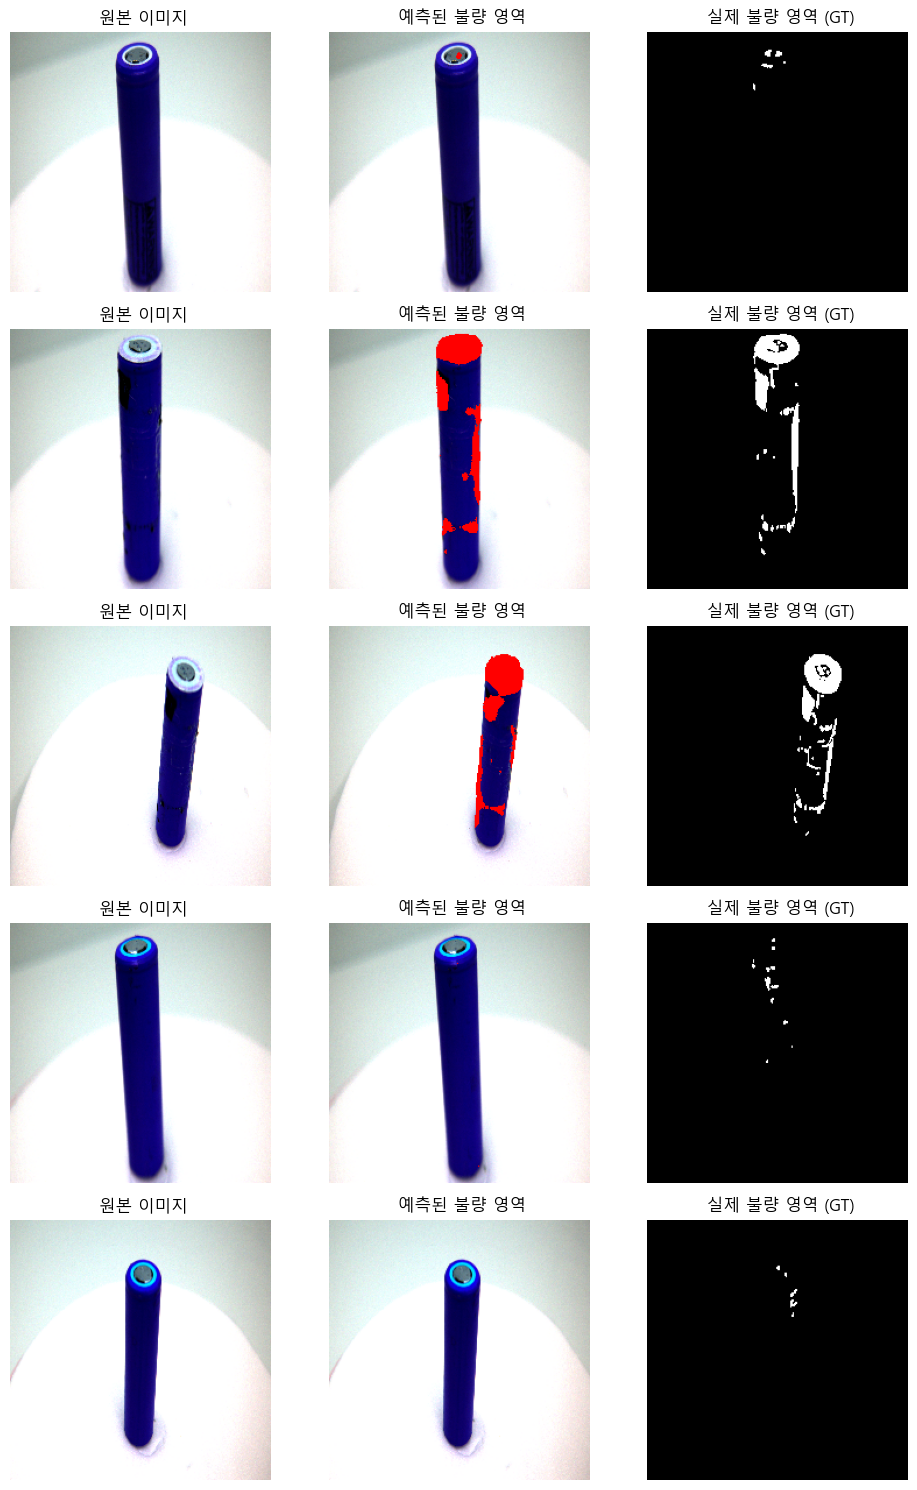

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 샘플 개수 설정 (최대 5개)
num_samples = 5
X_samples = X_test[:num_samples]  # 원본 이미지
Y_samples = Y_test[:num_samples]  # 실제 불량 마스크 (GT)
predictions_samples = predictions_binary[:num_samples]  # 예측된 마스크

# 시각화
fig, axes = plt.subplots(num_samples, 3, figsize=(10, num_samples * 3))

for i in range(num_samples):
    original = (X_samples[i] * 255).astype(np.uint8)  # 원본 이미지
    mask = predictions_samples[i].squeeze()  # 예측된 불량 마스크
    gt_mask = Y_samples[i].squeeze()  # Ground Truth

    #  원본 위에 예측 마스크 오버레이 (빨간색으로 수정)
    overlay = original.copy()
    overlay[mask == 1] = [0, 0, 255]  # OpenCV는 BGR 사용 → 빨간색은 (0, 0, 255)

    # 🔹 Plot (원본, 예측, GT 비교)
    axes[i, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(" 원본 이미지")
    
    axes[i, 1].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(" 예측된 불량 영역")

    axes[i, 2].imshow(gt_mask, cmap="gray")
    axes[i, 2].set_title(" 실제 불량 영역 (GT)")

    for ax in axes[i]:
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


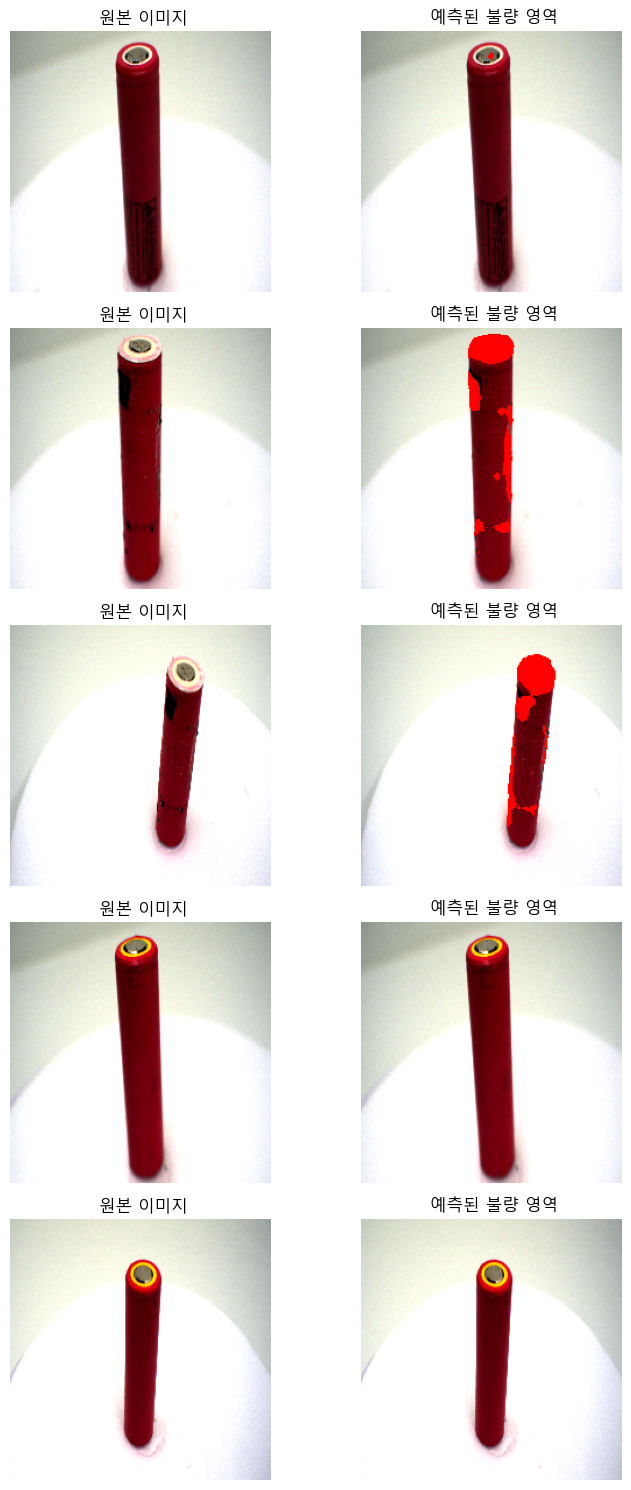

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model

# 이미지 폴더 경로
image_dir = "C:/sample_ex3000/filtered_defect/test/images/"

# 모델 로드
model = load_model("final_unet_model.h5", compile=False)

# Threshold 설정
threshold = 0.04

# 폴더에서 이미지 파일 리스트 가져오기
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
num_samples = min(5, len(image_files))  # 최대 5개만 로드

X_samples = []
original_images = []

for img_file in image_files[:num_samples]:
    img_path = os.path.join(image_dir, img_file)
    original = cv2.imread(img_path)  # 원본 이미지 로드
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # RGB 변환
    
    resized = cv2.resize(original, (224, 224))  # 모델 입력 크기로 변환
    X_samples.append(resized / 255.0)  # 정규화
    
    original_images.append(original)  # 원본 저장

X_samples = np.array(X_samples)

# 모델 예측 수행
predictions = model.predict(X_samples)
predictions_binary = (predictions > threshold).astype(np.uint8)  # Threshold 적용

# 결과 시각화
fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 3))

for i in range(num_samples):
    original = original_images[i]  # 원본 배터리 이미지
    mask = cv2.resize(predictions_binary[i].squeeze(), (original.shape[1], original.shape[0]))  # 원본 크기로 리사이즈

    #  원본 이미지 위에 예측 마스크 오버레이
    overlay = original.copy()
    overlay[mask == 1] = [255, 0, 0]  # 빨간색(불량 영역 표시)

    #  Plot (원본, 예측 비교)
    axes[i, 0].imshow(original)
    axes[i, 0].set_title(" 원본 이미지")
    
    axes[i, 1].imshow(overlay)
    axes[i, 1].set_title(" 예측된 불량 영역")

    for ax in axes[i]:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [75]:
from tensorflow.keras.models import load_model
import numpy as np

# 원래 모델 불러오기
model = load_model("final_unet_model.h5", compile=False)
print(" 원래 모델로 복원 완료!")


 원래 모델로 복원 완료!


In [81]:
import numpy as np
from tensorflow.keras.models import load_model

# ✅ 모델 불러오기
model = load_model("final_unet_model.h5", compile=False)

# ✅ 테스트 데이터 예측 수행
predictions = model.predict(X_test)

# ✅ 테스트할 Threshold 범위 설정 (0.40 ~ 0.80, 0.05 간격)
thresholds = np.arange(0.01, 0.05, 0.003)

# ✅ Dice Score 저장할 리스트
dice_scores = []

# ✅ 각 Threshold에 대해 Dice Score 계산
for threshold in thresholds:
    predictions_binary = (predictions > threshold).astype(np.uint8)
    
    dices = []
    for i in range(len(Y_test)):
        intersection = np.logical_and(Y_test[i].squeeze(), predictions_binary[i].squeeze()).sum()
        union = Y_test[i].sum() + predictions_binary[i].sum()
        dice_score = (2. * intersection) / union if union != 0 else 0
        dices.append(dice_score)
    
    mean_dice = np.mean(dices)
    dice_scores.append(mean_dice)
    print(f"Threshold={threshold:.3f} → 평균 Dice Score: {mean_dice:.4f}")

# ✅ 최적 Threshold 찾기
best_idx = np.argmax(dice_scores)
best_threshold = thresholds[best_idx]
best_dice = dice_scores[best_idx]

print(f"\n최적 Threshold: {best_threshold:.3f}, 최고 Dice Score: {best_dice:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 880ms/step
Threshold=0.010 → 평균 Dice Score: 0.5287
Threshold=0.015 → 평균 Dice Score: 0.5305
Threshold=0.020 → 평균 Dice Score: 0.5327
Threshold=0.025 → 평균 Dice Score: 0.5327
Threshold=0.030 → 평균 Dice Score: 0.5330
Threshold=0.035 → 평균 Dice Score: 0.5329
Threshold=0.040 → 평균 Dice Score: 0.5331
Threshold=0.045 → 평균 Dice Score: 0.5328

최적 Threshold: 0.040, 최고 Dice Score: 0.5331


In [74]:
# 예측 수행
predictions = model.predict(X_test)

# IoU (Intersection over Union) 계산 함수
def compute_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

# Dice Score 계산 함수
def compute_dice(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return (2. * intersection) / (y_true.sum() + y_pred.sum()) if (y_true.sum() + y_pred.sum()) != 0 else 0

# 기존 최적 Threshold 적용 (
threshold = 0.04
predictions_binary = (predictions > threshold).astype(np.uint8)

# 전체 테스트셋 성능 평가
ious, dices = [], []
for i in range(len(Y_test)):
    iou_score = compute_iou(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    dice_score = compute_dice(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    ious.append(iou_score)
    dices.append(dice_score)

# 평균 IoU & Dice Score 출력
print(f"평균 IoU Score: {np.mean(ious):.4f}")
print(f" 평균 Dice Score: {np.mean(dices):.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 740ms/step
평균 IoU Score: 0.3964
 평균 Dice Score: 0.5331
